In [2]:
import pandas as pd
import matplotlib
import numpy as np
import datetime 

In [3]:
sleep = pd.read_csv('sleepmeta.csv')
sleep

,idSleepMeta,studyID_sleep,startTime,isMainSleep,minToFallAsleep,numAwakeTimes,minsAwake,timeInBed,minsAsleep,awakeDuration,efficiency,restlessCount,durationMS,restlessDuration,awakeCount,minutesAfterWakeup
0,6,5,23:55:00,1,6,16,27,409,376,2,93,14,24540000,31,2,0
1,7,6,00:57:30,1,0,13,22,320,294,4,93,11,19200000,22,2,0
2,8,7,23:04:00,1,0,15,30,314,282,0,90,15,18840000,32,0,0
3,9,7,04:19:00,0,0,5,5,144,133,0,96,5,8640000,6,0,0
4,10,8,00:25:00,1,0,15,26,417,387,1,94,14,25020000,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337654,338831,474038,04:56:30,1,0,19,37,415,378,4,91,16,24900000,33,3,0
337655,338832,474039,02:31:00,1,0,13,23,344,316,5,93,10,20640000,23,3,5
337656,338833,474040,23:58:00,1,0,9,31,340,309,1,91,8,20400000,30,1,0
337657,338834,474041,03:52:30,1,0,10,16,442,426,1,96,9,26520000,15,1,0


In [4]:
# avg hours slept
sleep['minsAsleep'].mean()/60

6.275421949363115

In [5]:
# avg hours in bed
sleep['timeInBed'].mean()/60

6.748502680712395

In [6]:
sleep[['minToFallAsleep', 'numAwakeTimes','minsAwake','timeInBed','minsAsleep','awakeDuration','efficiency','restlessCount','restlessDuration','awakeCount','minutesAfterWakeup']].mean()

minToFallAsleep         0.224288
numAwakeTimes          13.684525
minsAwake              26.762814
timeInBed             404.910161
minsAsleep            376.525317
awakeDuration           2.690715
efficiency             93.232883
restlessCount          12.482022
restlessDuration       25.623457
awakeCount              1.202503
minutesAfterWakeup      0.963647
dtype: float64

In [7]:
sleep['minutesAfterWakeup'].hist(bins = 10)

In [8]:
minAfterWakeup = sleep['minutesAfterWakeup']
maw = sleep.groupby('minutesAfterWakeup', as_index=False).count()
maw = maw[maw['idSleepMeta'] > 10]['minutesAfterWakeup']
sleep1 = sleep[sleep['minutesAfterWakeup'].isin(maw)]

In [9]:
sleep1['minutesAfterWakeup'].describe()

count    337461.000000
mean          0.919283
std           2.815781
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          62.000000
Name: minutesAfterWakeup, dtype: float64

In [10]:
t = []
for time in sleep['startTime']:
    hr = int(time.split(':')[0])
    if hr > 12:
        hr = hr - 24
    m = int(time.split(':')[1])
    s = int(time.split(':')[2])
    t.append(hr + m/60 + s/3600)

In [11]:
np.mean(t)

1.0872810891395688

In [12]:
.0872810891395688*60

5.236865348374128

In [13]:
0.236865348374128*60

14.21192090244768

In [14]:
# average bedtime is 1:05:14

In [15]:
a = pd.read_csv("sleep_data_full.csv")
a.head()

,participID,dataDate,complyPercent,idSleepMeta,startTime,isMainSleep,minToFallAsleep,minsAwake,timeInBed,minsAsleep,efficiency,restlessDuration,durationMS,minutesAfterWakeup
0,3LZJFK,2015-07-27,98,6,23:55:00,1,6,27,409,376,93,31,24540000,0
1,3LZJFK,2015-07-28,95,7,00:57:30,1,0,22,320,294,93,22,19200000,0
2,3LZJFK,2015-07-29,99,8,23:04:00,1,0,30,314,282,90,32,18840000,0
3,3LZJFK,2015-07-29,99,9,04:19:00,0,0,5,144,133,96,6,8640000,0
4,3LZJFK,2015-07-30,89,10,00:25:00,1,0,26,417,387,94,29,25020000,0


In [16]:
a['weekdayName'] = pd.to_datetime(a['dataDate']).dt.weekday_name

In [17]:
a.head()

,participID,dataDate,complyPercent,idSleepMeta,startTime,isMainSleep,minToFallAsleep,minsAwake,timeInBed,minsAsleep,efficiency,restlessDuration,durationMS,minutesAfterWakeup,weekdayName
0,3LZJFK,2015-07-27,98,6,23:55:00,1,6,27,409,376,93,31,24540000,0,Monday
1,3LZJFK,2015-07-28,95,7,00:57:30,1,0,22,320,294,93,22,19200000,0,Tuesday
2,3LZJFK,2015-07-29,99,8,23:04:00,1,0,30,314,282,90,32,18840000,0,Wednesday
3,3LZJFK,2015-07-29,99,9,04:19:00,0,0,5,144,133,96,6,8640000,0,Wednesday
4,3LZJFK,2015-07-30,89,10,00:25:00,1,0,26,417,387,94,29,25020000,0,Thursday


In [18]:
a['weekendNight'] = a['weekdayName'].apply(lambda x: 1 if (x == 'Friday' or x == 'Saturday') else 0)
a

,participID,dataDate,complyPercent,idSleepMeta,startTime,isMainSleep,minToFallAsleep,minsAwake,timeInBed,minsAsleep,efficiency,restlessDuration,durationMS,minutesAfterWakeup,weekdayName,weekendNight
0,3LZJFK,2015-07-27,98,6,23:55:00,1,6,27,409,376,93,31,24540000,0,Monday,0
1,3LZJFK,2015-07-28,95,7,00:57:30,1,0,22,320,294,93,22,19200000,0,Tuesday,0
2,3LZJFK,2015-07-29,99,8,23:04:00,1,0,30,314,282,90,32,18840000,0,Wednesday,0
3,3LZJFK,2015-07-29,99,9,04:19:00,0,0,5,144,133,96,6,8640000,0,Wednesday,0
4,3LZJFK,2015-07-30,89,10,00:25:00,1,0,26,417,387,94,29,25020000,0,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337654,3MWQ8P,2019-05-18,97,338831,04:56:30,1,0,37,415,378,91,33,24900000,0,Saturday,1
337655,3P64V9,2019-05-18,100,338832,02:31:00,1,0,23,344,316,93,23,20640000,5,Saturday,1
337656,3P64V9,2019-05-19,100,338833,23:58:00,1,0,31,340,309,91,30,20400000,0,Sunday,0
337657,3MNF9J,2019-05-18,98,338834,03:52:30,1,0,16,442,426,96,15,26520000,0,Saturday,1


In [19]:
a[a['minsAsleep'] > 720].agg({'complyPercent':['mean', 'median', 'min', 'max']})
#set comply percent from these results

,complyPercent
mean,77.042181
median,95.000000
min,0.000000
max,100.000000


In [20]:
a = a[a['complyPercent'] > 80]
a = a[a['minsAsleep'] < 720]

In [21]:
a.groupby('weekendNight').agg({"restlessDuration": ["mean", "min", "max"]})

restlessDuration         
                         mean min  max
weekendNight                          
0                   26.105169   0  559
1                   25.186219   0  555

In [22]:
a.groupby('weekendNight').agg({"minsAsleep": ["mean", "min", "max"]})

minsAsleep         
                    mean min  max
weekendNight                     
0             380.202465   0  719
1             375.169388   0  719

In [23]:
t_weekday = []
t_weekend = []
a_weekday = a[a['weekendNight'] == 0]
a_weekend = a[a['weekendNight'] == 1]
for time in a_weekday['startTime']:
    hr = int(time.split(':')[0])
    if hr > 12:
        hr = hr - 24
    m = int(time.split(':')[1])
    s = int(time.split(':')[2])
    t_weekday.append(hr + m/60 + s/3600)
for time in a_weekend['startTime']:
    hr = int(time.split(':')[0])
    if hr > 12:
        hr = hr - 24
    m = int(time.split(':')[1])
    s = int(time.split(':')[2])
    t_weekend.append(hr + m/60 + s/3600)

In [24]:
np.mean(t_weekday)

1.041268191395466

In [25]:
.041268191395466*60

2.47609148372796

In [26]:
0.47609148372796 *60

28.5654890236776

In [27]:
# avg weekday bedtime = 1:02:28

In [28]:
np.mean(t_weekend)

1.2828226298574497

In [29]:
0.2828226298574497*60

16.96935779144698

In [30]:
0.96935779144698*60

58.1614674868188

In [31]:
# avg weekend bedtime = 1:16:58

In [108]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [48]:
full = pd.read_csv('full.csv')
full.head()

,idStudy,participID,dataDate,dataTime,fetchStamp,overallResultValue,heartMinsFound,sleepMinsFound,calMinsFound,stepMinsFound,...,minsAwake,timeInBed,minsAsleep,awakeDuration,efficiency,restlessCount,durationMS,restlessDuration,awakeCount,minutesAfterWakeup
0,6178,3LZGLG,2015-08-25,00:00:00,1441145130,3,1331,440,1440,1440,...,14,440,423,1,97,10,26400000,16,1,0
1,6179,3LZGLG,2015-08-26,00:00:00,1441145132,3,1424,434,1440,1440,...,16,434,417,1,96,8,26040000,16,1,0
2,6180,3LZGLG,2015-08-27,00:00:00,1441145134,3,1412,469,1440,1440,...,24,469,431,2,95,12,28140000,36,1,11
3,6181,3LZGLG,2015-08-28,00:00:00,1441145136,3,1350,354,1440,1440,...,9,354,339,1,97,8,21240000,14,1,0
4,6182,3LZGLG,2015-08-29,00:00:00,1441145138,3,1417,502,1440,1440,...,43,435,376,8,90,16,26100000,51,2,0


In [68]:
full_efficiency.dtypes

minsAsleep            int64
lowRangeCal         float64
fatBurnCal          float64
cardioCal           float64
peakCal             float64
restHeart             int64
lowRangeMins          int64
fatBurnMins           int64
cardioMins            int64
peakMins              int64
efficiency            int64
restlessDuration      int64
dtype: object

In [85]:
full_efficiency = full[['minsAsleep','lowRangeCal','fatBurnCal','cardioCal','peakCal','restHeart', 'lowRangeMins','fatBurnMins','cardioMins','peakMins', 'efficiency','restlessDuration']]

In [97]:
X = full_efficiency.drop("minsAsleep",1)  #Feature Matrix
y = full_efficiency["minsAsleep"]       #Target Variable

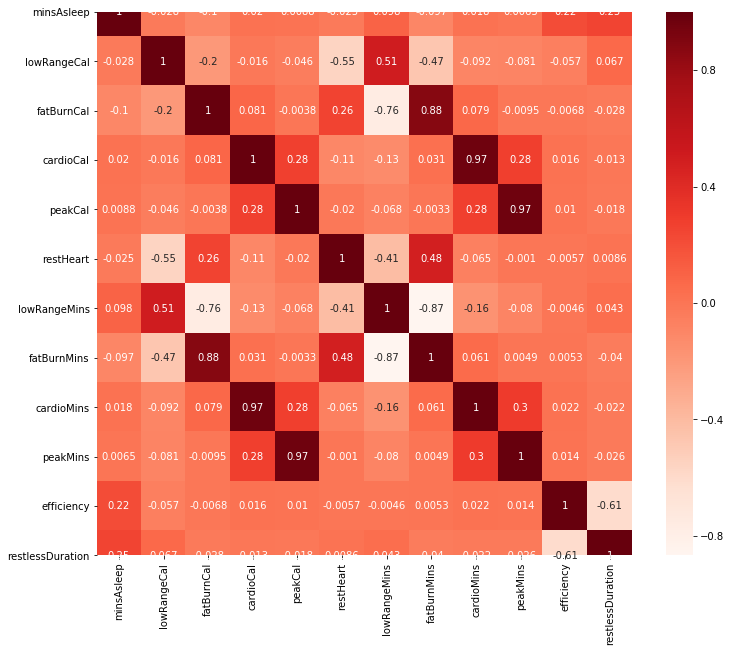

In [98]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = full_efficiency.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [99]:
#Correlation with output variable
cor_target = abs(cor["minsAsleep"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

minsAsleep    1.0
Name: minsAsleep, dtype: float64

In [100]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const               0.000000e+00
lowRangeCal         4.654975e-88
fatBurnCal          6.890282e-01
cardioCal           3.048511e-03
peakCal             1.143083e-01
restHeart           6.889756e-10
lowRangeMins        1.014937e-27
fatBurnMins         1.244509e-02
cardioMins          8.296143e-02
peakMins            2.387789e-01
efficiency          0.000000e+00
restlessDuration    0.000000e+00
dtype: float64

In [101]:
# remove anything over 0.05: fatBurnCal, peakCal, cardioMins, peakMins
X2 = X.drop('fatBurnCal', 1)
X2 = X2.drop('peakCal', 1)
X2 = X2.drop('cardioMins', 1)
X2 = X2.drop('peakMins', 1)
X_1 = sm.add_constant(X2)
model = sm.OLS(y,X_1).fit()
model.pvalues

const                0.000000e+00
lowRangeCal         6.970585e-102
cardioCal            1.248029e-09
restHeart            1.613748e-10
lowRangeMins         3.028939e-27
fatBurnMins          4.708266e-04
efficiency           0.000000e+00
restlessDuration     0.000000e+00
dtype: float64

In [104]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 7.735498
Best score using built-in LassoCV: 0.294858


In [105]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

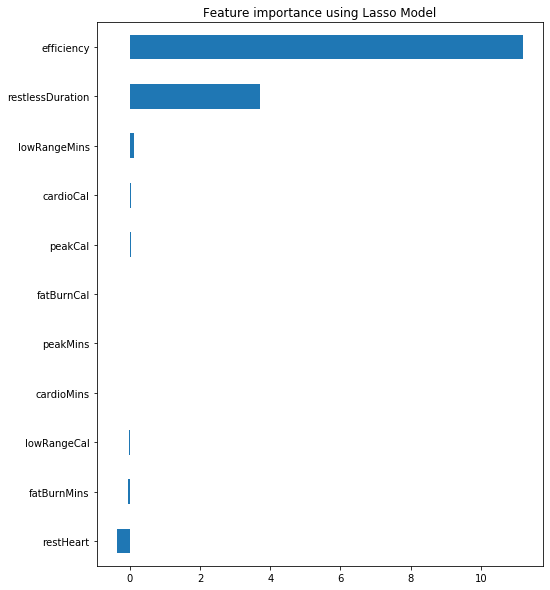

In [109]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

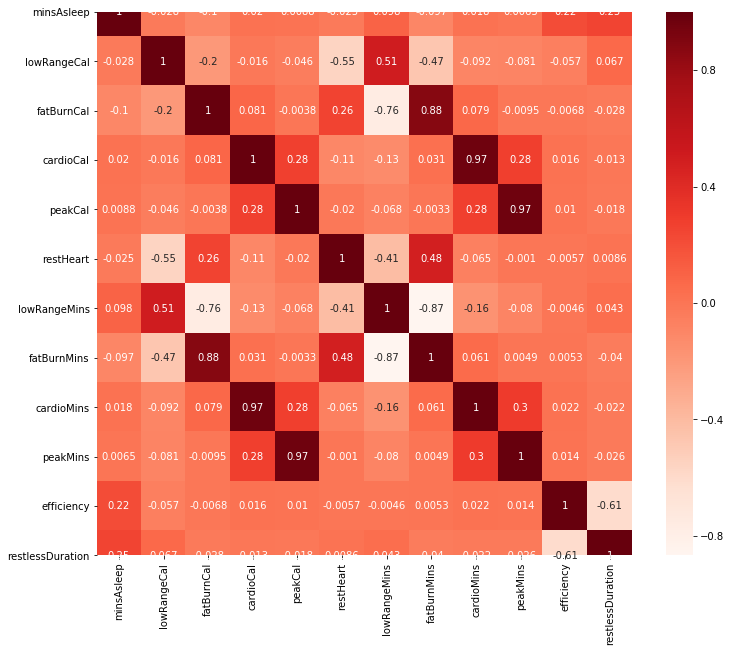

In [113]:
X_hr = full_efficiency.drop("restHeart",1)  #Feature Matrix
y_hr = full_efficiency["restHeart"]       #Target Variable
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = full_efficiency.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [114]:
#Correlation with output variable
cor_target = abs(cor["restHeart"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

lowRangeCal    0.554245
restHeart      1.000000
Name: restHeart, dtype: float64

In [115]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1_hr = sm.add_constant(X_hr)
#Fitting sm.OLS model
model = sm.OLS(y_hr,X_1_hr).fit()
model.pvalues

/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               0.000000e+00
minsAsleep          6.889756e-10
lowRangeCal         0.000000e+00
fatBurnCal          0.000000e+00
cardioCal           1.232244e-02
peakCal             5.250059e-03
lowRangeMins        9.033844e-56
fatBurnMins         0.000000e+00
cardioMins          2.330473e-14
peakMins            3.537244e-03
efficiency          2.437482e-02
restlessDuration    1.008485e-26
dtype: float64

In [116]:
reg = LassoCV()
reg.fit(X_hr, y_hr)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_hr,y_hr))
coef_hr = pd.Series(reg.coef_, index = X_hr.columns)
print("Lasso picked " + str(sum(coef_hr != 0)) + " variables and eliminated the other " +  str(sum(coef_hr == 0)) + " variables")

/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 2.631421
Best score using built-in LassoCV: 0.421280
Lasso picked 7 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

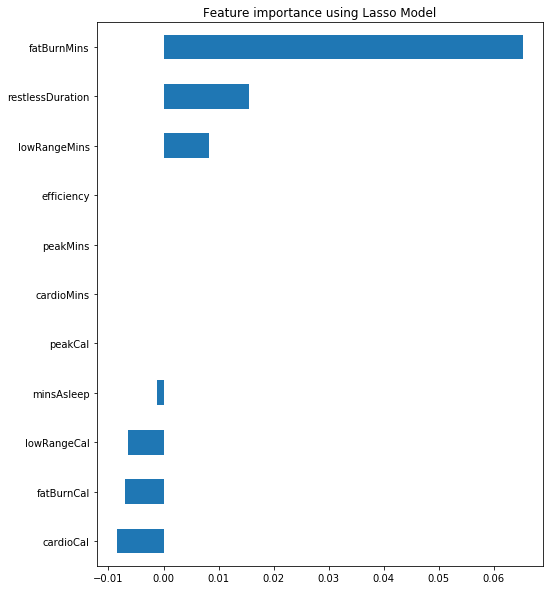

In [117]:
imp_coef = coef_hr.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")